In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lyricss/irish-lyrics-eof.txt


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
tokenizer = Tokenizer()

data=open('/kaggle/input/lyricss/irish-lyrics-eof.txt').read()
corpus=data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
word_index=tokenizer.word_index

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
        
        
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences=np.array(pad_sequences(input_sequences,maxlen=max_sequence_len))

xs=input_sequences[:,:-1]
labels=input_sequences[:,-1]

ys=tf.keras.utils.to_categorical(labels,num_classes=len(word_index)+1)
ms=len(word_index)+1
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(ms,100))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)))
model.add(tf.keras.layers.Dense(ms,activation='softmax'))
adam=tf.keras.optimizers.Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=500, verbose=1)


seed_text = "I've got a bad feeling about this"
next_words = 100

  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Epoch 1/500
377/377 [==============================] - 8s 8ms/step - loss: 6.8462 - accuracy: 0.0637
Epoch 2/500
377/377 [==============================] - 3s 9ms/step - loss: 5.7479 - accuracy: 0.1082
Epoch 3/500
377/377 [==============================] - 3s 8ms/step - loss: 4.8489 - accuracy: 0.1660
Epoch 4/500
377/377 [==============================] - 3s 9ms/step - loss: 3.9238 - accuracy: 0.2433
Epoch 5/500
377/377 [==============================] - 3s 9ms/step - loss: 3.0146 - accuracy: 0.3635
Epoch 6/500
377/377 [==============================] - 4s 10ms/step - loss: 2.3356 - accuracy: 0.4806
Epoch 7/500
377/377 [==============================] - 3s 8ms/step - loss: 1.8623 - accuracy: 0.5653
Epoch 8/500
377/377 [==============================] - 3s 9ms/step - loss: 1.5482 - accuracy: 0.6324
Epoch 9/500
377/377 [==============================] - 3s 9ms/step - loss: 1.2817 - accuracy: 0.6971
Epoch 10/500
377/377 [==============================] - 3s 9ms/step - loss: 1.1344 - accur

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I've got a bad feeling about this she did say she is spinning the fair ill bring but iii heard and now by the street in killarney and beer me love easy and flesh so thee shaken reach heavens feet from town to town and feet did not inside polkas ballyjamesduff leave me take home again grief is free runctions of yore than your darlin sportin saw that goodbye together wed go roamin oer the mountains far away oer oer oer away oer the dim weeping dawn late leaps says cailín deas crúite na mbó pie pie free invitation until but december ross dow corporal casey in


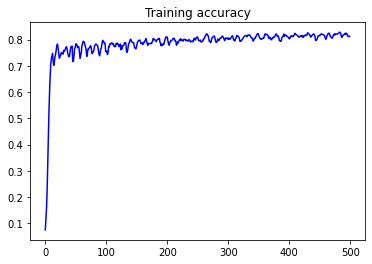

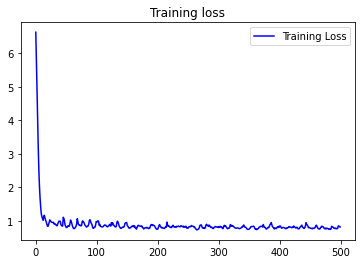

In [4]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()